Load the Dataset

In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load the dataset
df = pd.read_excel('Assignment_Twitter.xlsx')
df.head()

,Post Id,Handle,Post Time,Platform,Post,Sentiment,Category
0,1782120000000000000,@_ShouvikSarkar,2024-04-22 00:33:00,X,"Almost every house in this area is using AC, b...",NaN,NaN
1,1782126566686040000,@_ShouvikSarkar,22 Apr 2024 00:47:38,X,@CESCLimited speed of the fan right now is lik...,NaN,NaN
2,1782498315227020000,@_ShouvikSarkar,23 Apr 2024 01:24:50,X,@CESCLimited Same problem is still going on. A...,NaN,NaN
3,1782499085305460000,@_ShouvikSarkar,23 Apr 2024 01:27:53,X,@CESCLimited And if this continues every elect...,NaN,NaN
4,1782130854615280000,@_ShouvikSarkar,22 Apr 2024 01:04:40,X,@CESCLimited Grateful for the rapid resolution...,Positive,supply


In [2]:
df.tail()

,Post Id,Handle,Post Time,Platform,Post,Sentiment,Category
777,1780330000000000000,@zorro74733061,2024-04-17 01:37:00,X,"@CESCLimited 30 mins any ""proactiveness""? Caus...",Negative,Supply
778,1780340000000000000,@zorro74733061,2024-04-17 02:08:00,X,@CESCLimited Past 2 AM... more than 3 hrs...he...,Negative,Supply
779,1781810000000000000,@zorro74733061,2024-04-21 03:49:00,X,@CESCLimited 4th time in 4 days.... congrats o...,NaN,NaN
780,1781830000000000000,@zorro74733061,2024-04-21 05:25:00,X,"@CESCLimited Unfortunately ur ""relentless"" tea...",NaN,NaN
781,1781840000000000000,@zorro74733061,2024-04-21 05:29:00,X,@CESCLimited @DrSanjivGoenka Ur team is workin...,NaN,NaN


In [3]:
# Display basic information about the dataframe
print("Basic Information:")
print(df.info())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Post Id    782 non-null    int64 
 1   Handle     782 non-null    object
 2   Post Time  782 non-null    object
 3   Platform   782 non-null    object
 4   Post       782 non-null    object
 5   Sentiment  149 non-null    object
 6   Category   149 non-null    object
dtypes: int64(1), object(6)
memory usage: 42.9+ KB
None


In [4]:
# Unique value counts for categorical columns
print("\nUnique Value Counts for Categorical Columns:")
print(df.nunique())


Unique Value Counts for Categorical Columns:
Post Id      276
Handle       359
Post Time    683
Platform       1
Post         777
Sentiment      3
Category       4
dtype: int64


In [5]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Post Id        0
Handle         0
Post Time      0
Platform       0
Post           0
Sentiment    633
Category     633
dtype: int64


Sentiment Analysis

In [6]:
# Function to clean the text data
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower().strip()  # Convert to lowercase and strip whitespace
    return text

# Apply the cleaning function to the 'Post' column
df['Cleaned_Post'] = df['Post'].apply(clean_text)
df.head()

,Post Id,Handle,Post Time,Platform,Post,Sentiment,Category,Cleaned_Post
0,1782120000000000000,@_ShouvikSarkar,2024-04-22 00:33:00,X,"Almost every house in this area is using AC, b...",NaN,NaN,almost every house in this area is using ac bu...
1,1782126566686040000,@_ShouvikSarkar,22 Apr 2024 00:47:38,X,@CESCLimited speed of the fan right now is lik...,NaN,NaN,speed of the fan right now is like it is runni...
2,1782498315227020000,@_ShouvikSarkar,23 Apr 2024 01:24:50,X,@CESCLimited Same problem is still going on. A...,NaN,NaN,same problem is still going on and today its h...
3,1782499085305460000,@_ShouvikSarkar,23 Apr 2024 01:27:53,X,@CESCLimited And if this continues every elect...,NaN,NaN,and if this continues every electronic device ...
4,1782130854615280000,@_ShouvikSarkar,22 Apr 2024 01:04:40,X,@CESCLimited Grateful for the rapid resolution...,Positive,supply,grateful for the rapid resolution of the power...


In [7]:
# Function to determine sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the sentiment analysis function to each post
df['Sentiment'] = df['Cleaned_Post'].apply(get_sentiment)
df.head()

,Post Id,Handle,Post Time,Platform,Post,Sentiment,Category,Cleaned_Post
0,1782120000000000000,@_ShouvikSarkar,2024-04-22 00:33:00,X,"Almost every house in this area is using AC, b...",Positive,NaN,almost every house in this area is using ac bu...
1,1782126566686040000,@_ShouvikSarkar,22 Apr 2024 00:47:38,X,@CESCLimited speed of the fan right now is lik...,Positive,NaN,speed of the fan right now is like it is runni...
2,1782498315227020000,@_ShouvikSarkar,23 Apr 2024 01:24:50,X,@CESCLimited Same problem is still going on. A...,Positive,NaN,same problem is still going on and today its h...
3,1782499085305460000,@_ShouvikSarkar,23 Apr 2024 01:27:53,X,@CESCLimited And if this continues every elect...,Positive,NaN,and if this continues every electronic device ...
4,1782130854615280000,@_ShouvikSarkar,22 Apr 2024 01:04:40,X,@CESCLimited Grateful for the rapid resolution...,Positive,supply,grateful for the rapid resolution of the power...


In [8]:
df.tail()

,Post Id,Handle,Post Time,Platform,Post,Sentiment,Category,Cleaned_Post
777,1780330000000000000,@zorro74733061,2024-04-17 01:37:00,X,"@CESCLimited 30 mins any ""proactiveness""? Caus...",Neutral,Supply,mins any proactiveness cause and estimate
778,1780340000000000000,@zorro74733061,2024-04-17 02:08:00,X,@CESCLimited Past 2 AM... more than 3 hrs...he...,Positive,Supply,past am more than hrshello proactiveness atl...
779,1781810000000000000,@zorro74733061,2024-04-21 03:49:00,X,@CESCLimited 4th time in 4 days.... congrats o...,Neutral,NaN,th time in days congrats on ur repeated failu...
780,1781830000000000000,@zorro74733061,2024-04-21 05:25:00,X,"@CESCLimited Unfortunately ur ""relentless"" tea...",Negative,NaN,unfortunately ur relentless team couldnt even ...
781,1781840000000000000,@zorro74733061,2024-04-21 05:29:00,X,@CESCLimited @DrSanjivGoenka Ur team is workin...,Negative,NaN,ur team is working from last four days if not...


In [9]:
# Function to categorize the posts
def categorize_post(text):
    text = text.lower()
    if any(keyword in text for keyword in ['supply', 'power cut', 'no power', 'outage']):
        return 'Supply'
    elif any(keyword in text for keyword in ['voltage', 'low voltage', 'high voltage', 'fluctuation']):
        return 'Voltage'
    else:
        return 'Other'
    
# Apply the categorization function to each post
df['Category'] = df['Cleaned_Post'].apply(categorize_post)
df.head()

,Post Id,Handle,Post Time,Platform,Post,Sentiment,Category,Cleaned_Post
0,1782120000000000000,@_ShouvikSarkar,2024-04-22 00:33:00,X,"Almost every house in this area is using AC, b...",Positive,Other,almost every house in this area is using ac bu...
1,1782126566686040000,@_ShouvikSarkar,22 Apr 2024 00:47:38,X,@CESCLimited speed of the fan right now is lik...,Positive,Other,speed of the fan right now is like it is runni...
2,1782498315227020000,@_ShouvikSarkar,23 Apr 2024 01:24:50,X,@CESCLimited Same problem is still going on. A...,Positive,Other,same problem is still going on and today its h...
3,1782499085305460000,@_ShouvikSarkar,23 Apr 2024 01:27:53,X,@CESCLimited And if this continues every elect...,Positive,Other,and if this continues every electronic device ...
4,1782130854615280000,@_ShouvikSarkar,22 Apr 2024 01:04:40,X,@CESCLimited Grateful for the rapid resolution...,Positive,Supply,grateful for the rapid resolution of the power...


In [10]:
df.tail()

,Post Id,Handle,Post Time,Platform,Post,Sentiment,Category,Cleaned_Post
777,1780330000000000000,@zorro74733061,2024-04-17 01:37:00,X,"@CESCLimited 30 mins any ""proactiveness""? Caus...",Neutral,Other,mins any proactiveness cause and estimate
778,1780340000000000000,@zorro74733061,2024-04-17 02:08:00,X,@CESCLimited Past 2 AM... more than 3 hrs...he...,Positive,Other,past am more than hrshello proactiveness atl...
779,1781810000000000000,@zorro74733061,2024-04-21 03:49:00,X,@CESCLimited 4th time in 4 days.... congrats o...,Neutral,Supply,th time in days congrats on ur repeated failu...
780,1781830000000000000,@zorro74733061,2024-04-21 05:25:00,X,"@CESCLimited Unfortunately ur ""relentless"" tea...",Negative,Other,unfortunately ur relentless team couldnt even ...
781,1781840000000000000,@zorro74733061,2024-04-21 05:29:00,X,@CESCLimited @DrSanjivGoenka Ur team is workin...,Negative,Other,ur team is working from last four days if not...


Exploratory Data Analysis (EDA)

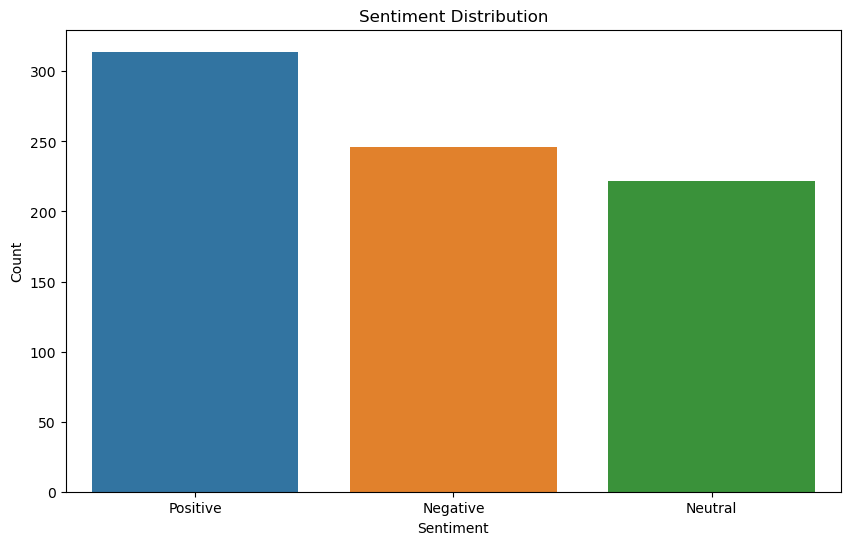

In [11]:
# Sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sentiment')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

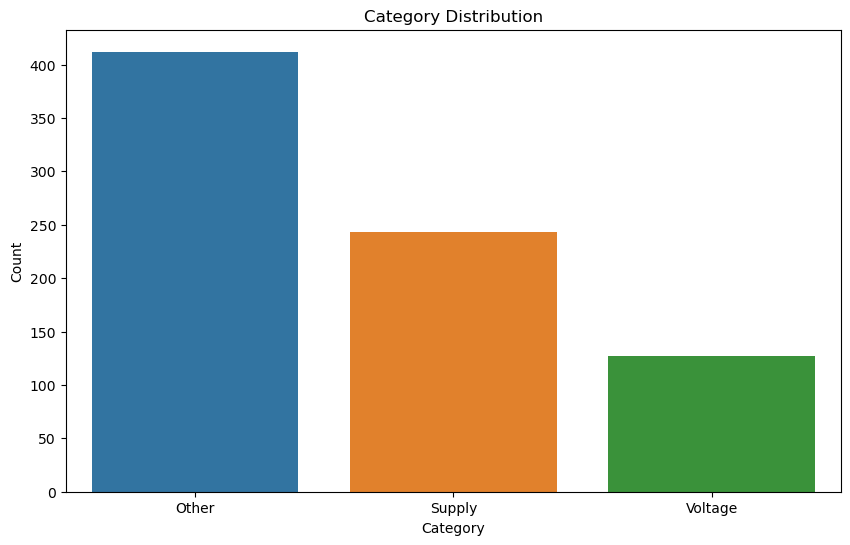

In [12]:
# Category distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Category')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

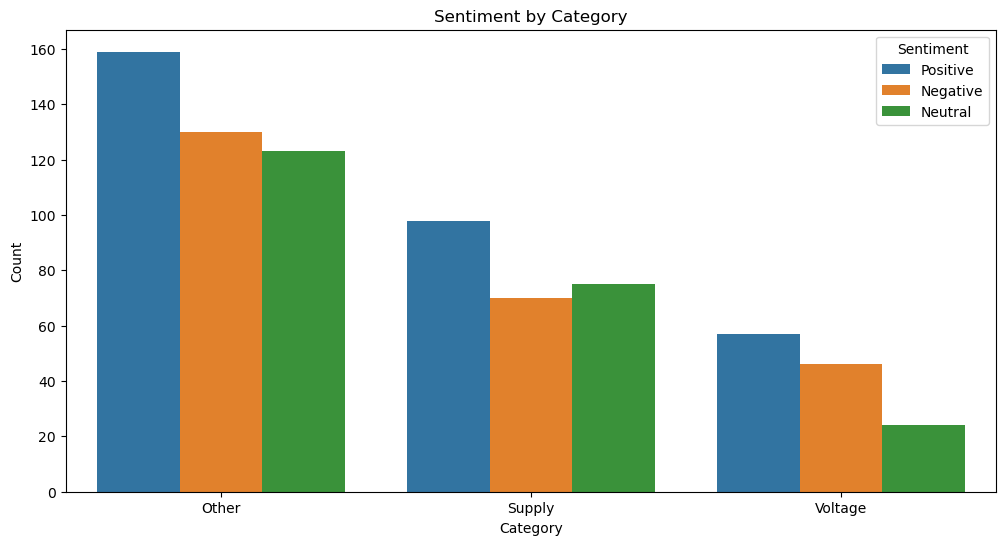

In [13]:
# Sentiment by Category
plt.figure(figsize=(12, 6))
sns.countplot(x='Category', hue='Sentiment', data=df)
plt.title('Sentiment by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

In [14]:
# Temporal Analysis (if Post Time is in datetime format)
df['Post Time'] = pd.to_datetime(df['Post Time'], errors='coerce')
df.set_index('Post Time', inplace=True)

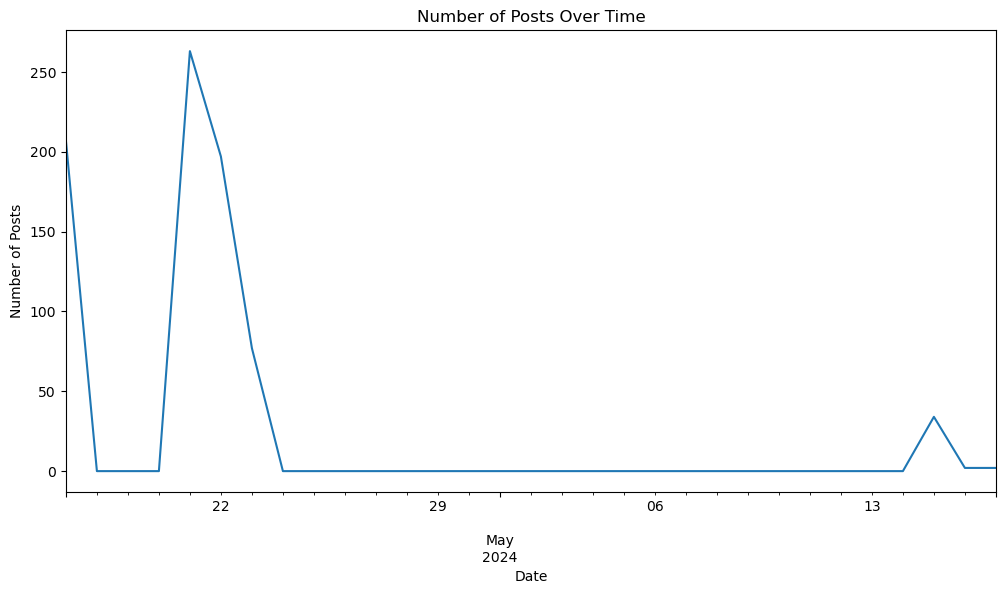

In [15]:
# Plot the number of posts over time
df['Post Id'].resample('D').count().plot(figsize=(12, 6), title='Number of Posts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.show()

Modelling

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])
df.head()

,Post Id,Handle,Platform,Post,Sentiment,Category,Cleaned_Post
Post Time,,,,,,,
2024-04-22 00:33:00,1782120000000000000,@_ShouvikSarkar,X,"Almost every house in this area is using AC, b...",Positive,0,almost every house in this area is using ac bu...
2024-04-22 00:47:38,1782126566686040000,@_ShouvikSarkar,X,@CESCLimited speed of the fan right now is lik...,Positive,0,speed of the fan right now is like it is runni...
2024-04-23 01:24:50,1782498315227020000,@_ShouvikSarkar,X,@CESCLimited Same problem is still going on. A...,Positive,0,same problem is still going on and today its h...
2024-04-23 01:27:53,1782499085305460000,@_ShouvikSarkar,X,@CESCLimited And if this continues every elect...,Positive,0,and if this continues every electronic device ...
2024-04-22 01:04:40,1782130854615280000,@_ShouvikSarkar,X,@CESCLimited Grateful for the rapid resolution...,Positive,1,grateful for the rapid resolution of the power...


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

tfidf = TfidfVectorizer(max_features=3000)

X = tfidf.fit_transform(df['Cleaned_Post']).toarray()

y = df['Category']

In [19]:
y

Post Time
2024-04-22 00:33:00    0
2024-04-22 00:47:38    0
2024-04-23 01:24:50    0
2024-04-23 01:27:53    0
2024-04-22 01:04:40    1
                      ..
2024-04-17 01:37:00    0
2024-04-17 02:08:00    0
2024-04-21 03:49:00    1
2024-04-21 05:25:00    0
2024-04-21 05:29:00    0
Name: Category, Length: 782, dtype: int32

In [20]:
X

array([[0.09831157, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [21]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [22]:
# Train a Logistic Regression model for category classification
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict the categories on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's performance
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred)*100)

              precision    recall  f1-score   support

           0       0.81      0.94      0.87        90
           1       0.86      0.74      0.79        42
           2       1.00      0.64      0.78        25

    accuracy                           0.84       157
   macro avg       0.89      0.77      0.82       157
weighted avg       0.85      0.84      0.84       157

Accuracy: 84.07643312101911


In [23]:
from sklearn.tree import DecisionTreeClassifier

# Train a Decision tree model for category classification
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# Predict the categories on the test set
y_pred_dtc = dtc.predict(X_test)

# Evaluate the model's performance
print(classification_report(y_test, y_pred_dtc))
print("Accuracy:", accuracy_score(y_test, y_pred_dtc)*100)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        90
           1       0.93      0.98      0.95        42
           2       1.00      0.96      0.98        25

    accuracy                           0.97       157
   macro avg       0.97      0.97      0.97       157
weighted avg       0.98      0.97      0.97       157

Accuracy: 97.45222929936305


In [24]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model for category classification
rfc = RandomForestClassifier() 
rfc.fit(X_train, y_train)

# Predict the categories on the test set
y_pred_rfc = rfc.predict(X_test)

# Evaluate the model's performance
print(classification_report(y_test, y_pred_rfc))
print("Accuracy:", accuracy_score(y_test, y_pred_rfc)*100)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96        90
           1       0.93      0.93      0.93        42
           2       1.00      0.96      0.98        25

    accuracy                           0.96       157
   macro avg       0.96      0.95      0.96       157
weighted avg       0.96      0.96      0.96       157

Accuracy: 95.54140127388536


In [25]:
from sklearn.svm import SVC

# Creating object for Support Vector Classifier
svc = SVC()

# Fitting the model
svc.fit(X_train, y_train)

# Predict the categories on the test set
y_pred_svc = svc.predict(X_test)
  

# Evaluate the model's performance
print(classification_report(y_test, y_pred_svc))
print("Accuracy:", accuracy_score(y_test, y_pred_svc)*100)

              precision    recall  f1-score   support

           0       0.81      0.98      0.89        90
           1       0.94      0.71      0.81        42
           2       1.00      0.68      0.81        25

    accuracy                           0.86       157
   macro avg       0.92      0.79      0.84       157
weighted avg       0.88      0.86      0.86       157

Accuracy: 85.98726114649682
